# Experiments - Round 2
## Multinomial Logistic Regression (Softmax Regression)
This notebook performs experiments for the classification of garments using the Multinomial Logistic Regression. The Multinomial Logitic Regression uses the softmax function to compute a single model capable of multiclass classification.

In [1]:
import sys
sys.path.append('../')
import SGD
from sklearn.model_selection import train_test_split

from utils import dataset_helper
from importlib import reload
from scipy import stats
import pandas as pd
reload(dataset_helper)

/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<module 'utils.dataset_helper' from '../utils/dataset_helper.py'>

In [2]:
normalization_comparison = []

In [3]:
X_train, y_train, _, _  = dataset_helper.load_fasion_mnist(scaling='default')
normalization_comparison.append(stats.describe(X_train[0]))

In [4]:
X_train, y_train, _, _  = dataset_helper.load_fasion_mnist(scaling='mean_std')
normalization_comparison.append(stats.describe(X_train[0]))

In [5]:
X_train, y_train, _, _  = dataset_helper.load_fasion_mnist(scaling='min_max')
normalization_comparison.append(stats.describe(X_train[0]))

In [6]:
df = pd.DataFrame(normalization_comparison)
df

,nobs,minmax,mean,variance,skewness,kurtosis
0,784,"(0.0, 1.0)",0.381388,0.159553,0.219186,-1.816807
1,784,"(-1.9222308239853982, 4.205628133086459)",0.323895,1.181219,0.584337,0.005424
2,784,"(0.0, 1.0)",0.381489,0.159539,0.218514,-1.816866


In [7]:
X, y, _, _  = dataset_helper.load_fasion_mnist()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from SGD import *
from SGD import softmax_logistic

48000
785
Iteration: 0 Cost= 2.077265486475514
Iteration: 1 Cost= 1.9190906427399763
Iteration: 2 Cost= 1.7889911084487566
Iteration: 3 Cost= 1.6811544118230226
Iteration: 4 Cost= 1.590984180697094
Iteration: 5 Cost= 1.5148578544083742
Iteration: 6 Cost= 1.4499507624162182
Iteration: 7 Cost= 1.3940754999923606
Iteration: 8 Cost= 1.3455346684752725
Iteration: 9 Cost= 1.3030051680895967
Iteration: 10 Cost= 1.2654481365083645
Iteration: 11 Cost= 1.2320412971220212
Iteration: 12 Cost= 1.202128049307293
Iteration: 13 Cost= 1.1751794705597398
Iteration: 14 Cost= 1.1507657680745267
Iteration: 15 Cost= 1.1285347782027575
Iteration: 16 Cost= 1.1081956356467
Iteration: 17 Cost= 1.089506289151974
Iteration: 18 Cost= 1.0722638737696262
Iteration: 19 Cost= 1.0562972290512964
Iteration: 20 Cost= 1.041461036266984
Iteration: 21 Cost= 1.0276311889347225
Iteration: 22 Cost= 1.014701109109374
Iteration: 23 Cost= 1.002578795000176
Iteration: 24 Cost= 0.991184438223624
Iteration: 25 Cost= 0.98044848805071

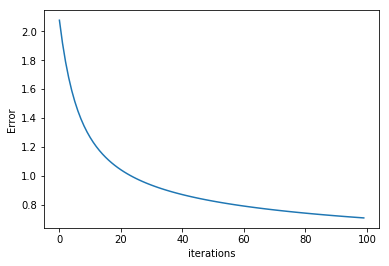


--- Classification
[3 1 5 ... 5 2 7]

--- Expected Output
[6 1 5 ... 5 2 7]
Validation Stats...
Accuracy: 0.777
Precision: 0.780
Recall: 0.776
F1 Score: 0.778077
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


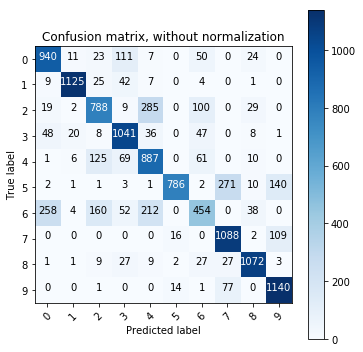

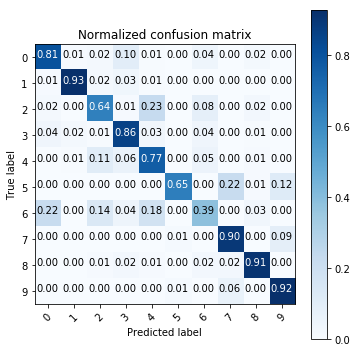

In [9]:

theta,acc = softmax_logistic.BGD(X_train,y_train,0.1,100)

predY = softmax_logistic.classify_softmax(theta,X_val)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

from utils.custom_scores import evaluate_multiclass
evaluate_multiclass(y_val, predY)


48000
785
Iteration: 0 Cost= 2.077265486475514
Iteration: 1 Cost= 1.9190906427399763
Iteration: 2 Cost= 1.7889911084487566
Iteration: 3 Cost= 1.6811544118230226
Iteration: 4 Cost= 1.590984180697094
Iteration: 5 Cost= 1.5148578544083742
Iteration: 6 Cost= 1.4499507624162182
Iteration: 7 Cost= 1.3940754999923606
Iteration: 8 Cost= 1.3455346684752725
Iteration: 9 Cost= 1.3030051680895967
Iteration: 10 Cost= 1.2654481365083645
Iteration: 11 Cost= 1.2320412971220212
Iteration: 12 Cost= 1.202128049307293
Iteration: 13 Cost= 1.1751794705597398
Iteration: 14 Cost= 1.1507657680745267
Iteration: 15 Cost= 1.1285347782027575
Iteration: 16 Cost= 1.1081956356467
Iteration: 17 Cost= 1.089506289151974
Iteration: 18 Cost= 1.0722638737696262
Iteration: 19 Cost= 1.0562972290512964
Iteration: 20 Cost= 1.041461036266984
Iteration: 21 Cost= 1.0276311889347225
Iteration: 22 Cost= 1.014701109109374
Iteration: 23 Cost= 1.002578795000176
Iteration: 24 Cost= 0.991184438223624
Iteration: 25 Cost= 0.98044848805071

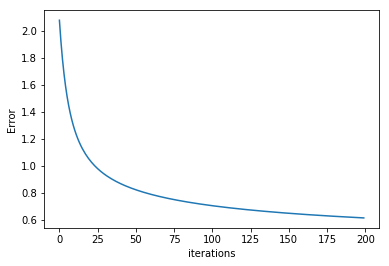


--- Classification
[3 1 5 ... 5 2 7]

--- Expected Output
[6 1 5 ... 5 2 7]
Validation Stats...
Accuracy: 0.803
Precision: 0.803
Recall: 0.802
F1 Score: 0.802609
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


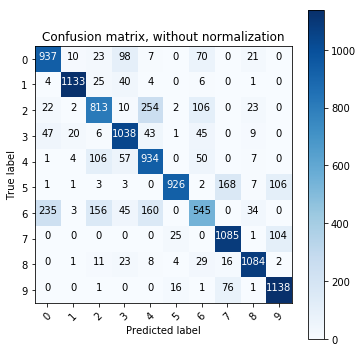

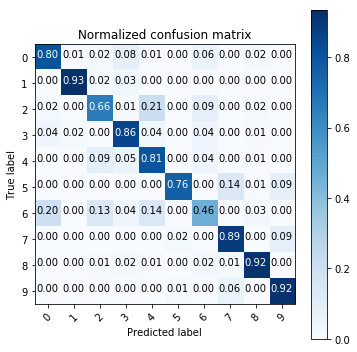

In [10]:

theta,acc = softmax_logistic.BGD(X_train,y_train,0.1,200)

predY = softmax_logistic.classify_softmax(theta,X_val)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

from utils.custom_scores import evaluate_multiclass
evaluate_multiclass(y_val, predY)


48000
785
Iteration: 0 Cost= 2.077265486475514
Iteration: 1 Cost= 1.9190906427399763
Iteration: 2 Cost= 1.7889911084487566
Iteration: 3 Cost= 1.6811544118230226
Iteration: 4 Cost= 1.590984180697094
Iteration: 5 Cost= 1.5148578544083742
Iteration: 6 Cost= 1.4499507624162182
Iteration: 7 Cost= 1.3940754999923606
Iteration: 8 Cost= 1.3455346684752725
Iteration: 9 Cost= 1.3030051680895967
Iteration: 10 Cost= 1.2654481365083645
Iteration: 11 Cost= 1.2320412971220212
Iteration: 12 Cost= 1.202128049307293
Iteration: 13 Cost= 1.1751794705597398
Iteration: 14 Cost= 1.1507657680745267
Iteration: 15 Cost= 1.1285347782027575
Iteration: 16 Cost= 1.1081956356467
Iteration: 17 Cost= 1.089506289151974
Iteration: 18 Cost= 1.0722638737696262
Iteration: 19 Cost= 1.0562972290512964
Iteration: 20 Cost= 1.041461036266984
Iteration: 21 Cost= 1.0276311889347225
Iteration: 22 Cost= 1.014701109109374
Iteration: 23 Cost= 1.002578795000176
Iteration: 24 Cost= 0.991184438223624
Iteration: 25 Cost= 0.98044848805071

Iteration: 209 Cost= 0.6109376887592912
Iteration: 210 Cost= 0.6104004886510338
Iteration: 211 Cost= 0.6098668187359285
Iteration: 212 Cost= 0.6093366396646779
Iteration: 213 Cost= 0.6088099127084052
Iteration: 214 Cost= 0.6082865997460174
Iteration: 215 Cost= 0.607766663251884
Iteration: 216 Cost= 0.6072500662838195
Iteration: 217 Cost= 0.6067367724713648
Iteration: 218 Cost= 0.6062267460043554
Iteration: 219 Cost= 0.6057199516217701
Iteration: 220 Cost= 0.6052163546008493
Iteration: 221 Cost= 0.6047159207464802
Iteration: 222 Cost= 0.6042186163808354
Iteration: 223 Cost= 0.6037244083332621
Iteration: 224 Cost= 0.6032332639304124
Iteration: 225 Cost= 0.6027451509866077
Iteration: 226 Cost= 0.6022600377944347
Iteration: 227 Cost= 0.6017778931155585
Iteration: 228 Cost= 0.6012986861717565
Iteration: 229 Cost= 0.600822386636158
Iteration: 230 Cost= 0.6003489646246903
Iteration: 231 Cost= 0.5998783906877224
Iteration: 232 Cost= 0.5994106358019013
Iteration: 233 Cost= 0.5989456713621766
It

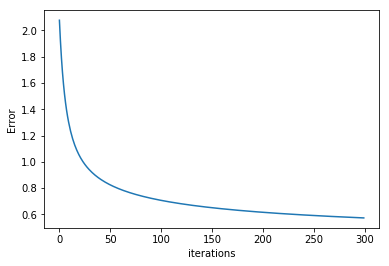


--- Classification
[3 1 5 ... 5 2 7]

--- Expected Output
[6 1 5 ... 5 2 7]
Validation Stats...
Accuracy: 0.813
Precision: 0.812
Recall: 0.812
F1 Score: 0.811896
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


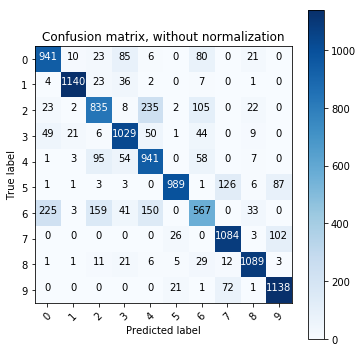

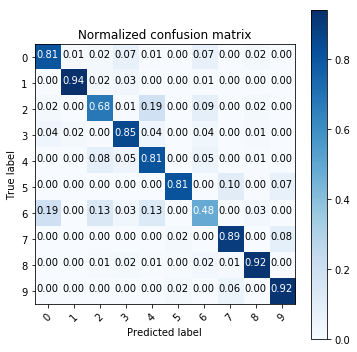

In [11]:

theta,acc = softmax_logistic.BGD(X_train,y_train,0.1,300)

predY = softmax_logistic.classify_softmax(theta,X_val)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

from utils.custom_scores import evaluate_multiclass
evaluate_multiclass(y_val, predY)


48000
785
Iteration: 0 Cost= 2.077265486475514
Iteration: 1 Cost= 1.9190906427399763
Iteration: 2 Cost= 1.7889911084487566
Iteration: 3 Cost= 1.6811544118230226
Iteration: 4 Cost= 1.590984180697094
Iteration: 5 Cost= 1.5148578544083742
Iteration: 6 Cost= 1.4499507624162182
Iteration: 7 Cost= 1.3940754999923606
Iteration: 8 Cost= 1.3455346684752725
Iteration: 9 Cost= 1.3030051680895967
Iteration: 10 Cost= 1.2654481365083645
Iteration: 11 Cost= 1.2320412971220212
Iteration: 12 Cost= 1.202128049307293
Iteration: 13 Cost= 1.1751794705597398
Iteration: 14 Cost= 1.1507657680745267
Iteration: 15 Cost= 1.1285347782027575
Iteration: 16 Cost= 1.1081956356467
Iteration: 17 Cost= 1.089506289151974
Iteration: 18 Cost= 1.0722638737696262
Iteration: 19 Cost= 1.0562972290512964
Iteration: 20 Cost= 1.041461036266984
Iteration: 21 Cost= 1.0276311889347225
Iteration: 22 Cost= 1.014701109109374
Iteration: 23 Cost= 1.002578795000176
Iteration: 24 Cost= 0.991184438223624
Iteration: 25 Cost= 0.98044848805071

Iteration: 209 Cost= 0.6109376887592912
Iteration: 210 Cost= 0.6104004886510338
Iteration: 211 Cost= 0.6098668187359285
Iteration: 212 Cost= 0.6093366396646779
Iteration: 213 Cost= 0.6088099127084052
Iteration: 214 Cost= 0.6082865997460174
Iteration: 215 Cost= 0.607766663251884
Iteration: 216 Cost= 0.6072500662838195
Iteration: 217 Cost= 0.6067367724713648
Iteration: 218 Cost= 0.6062267460043554
Iteration: 219 Cost= 0.6057199516217701
Iteration: 220 Cost= 0.6052163546008493
Iteration: 221 Cost= 0.6047159207464802
Iteration: 222 Cost= 0.6042186163808354
Iteration: 223 Cost= 0.6037244083332621
Iteration: 224 Cost= 0.6032332639304124
Iteration: 225 Cost= 0.6027451509866077
Iteration: 226 Cost= 0.6022600377944347
Iteration: 227 Cost= 0.6017778931155585
Iteration: 228 Cost= 0.6012986861717565
Iteration: 229 Cost= 0.600822386636158
Iteration: 230 Cost= 0.6003489646246903
Iteration: 231 Cost= 0.5998783906877224
Iteration: 232 Cost= 0.5994106358019013
Iteration: 233 Cost= 0.5989456713621766
It

Iteration: 415 Cost= 0.5432084806783213
Iteration: 416 Cost= 0.5430022354690028
Iteration: 417 Cost= 0.5427966889740123
Iteration: 418 Cost= 0.542591837197618
Iteration: 419 Cost= 0.5423876761760893
Iteration: 420 Cost= 0.5421842019773653
Iteration: 421 Cost= 0.5419814107007286
Iteration: 422 Cost= 0.5417792984764827
Iteration: 423 Cost= 0.5415778614656334
Iteration: 424 Cost= 0.5413770958595737
Iteration: 425 Cost= 0.5411769978797752
Iteration: 426 Cost= 0.5409775637774797
Iteration: 427 Cost= 0.5407787898333972
Iteration: 428 Cost= 0.5405806723574068
Iteration: 429 Cost= 0.540383207688262
Iteration: 430 Cost= 0.5401863921932982
Iteration: 431 Cost= 0.539990222268146
Iteration: 432 Cost= 0.5397946943364458
Iteration: 433 Cost= 0.5395998048495676
Iteration: 434 Cost= 0.5394055502863334
Iteration: 435 Cost= 0.5392119271527437
Iteration: 436 Cost= 0.5390189319817056
Iteration: 437 Cost= 0.5388265613327677
Iteration: 438 Cost= 0.5386348117918539
Iteration: 439 Cost= 0.5384436799710041
Ite

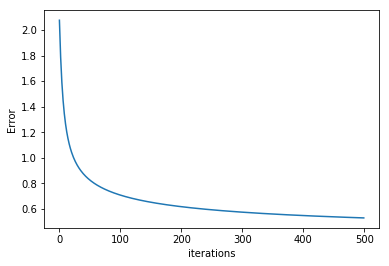


--- Classification
[3 1 5 ... 5 2 7]

--- Expected Output
[6 1 5 ... 5 2 7]
Validation Stats...
Accuracy: 0.825
Precision: 0.823
Recall: 0.824
F1 Score: 0.823261
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


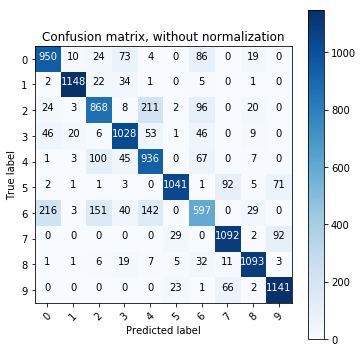

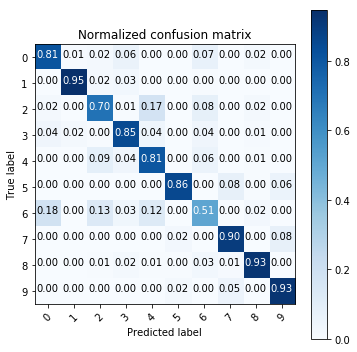

In [12]:

theta,acc = softmax_logistic.BGD(X_train,y_train,0.1,500)

predY = softmax_logistic.classify_softmax(theta,X_val)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

from utils.custom_scores import evaluate_multiclass
evaluate_multiclass(y_val, predY)


In [ ]:

theta,acc = softmax_logistic.BGD(X_train,y_train,0.1,1000)

predY = softmax_logistic.classify_softmax(theta,X_val)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

from utils.custom_scores import evaluate_multiclass
evaluate_multiclass(y_val, predY)


48000
785
Iteration: 0 Cost= 2.077265486475514
Iteration: 1 Cost= 1.9190906427399763
Iteration: 2 Cost= 1.7889911084487566
Iteration: 3 Cost= 1.6811544118230226
Iteration: 4 Cost= 1.590984180697094
Iteration: 5 Cost= 1.5148578544083742
Iteration: 6 Cost= 1.4499507624162182
Iteration: 7 Cost= 1.3940754999923606
Iteration: 8 Cost= 1.3455346684752725
Iteration: 9 Cost= 1.3030051680895967
Iteration: 10 Cost= 1.2654481365083645
Iteration: 11 Cost= 1.2320412971220212
Iteration: 12 Cost= 1.202128049307293
Iteration: 13 Cost= 1.1751794705597398
Iteration: 14 Cost= 1.1507657680745267
Iteration: 15 Cost= 1.1285347782027575
Iteration: 16 Cost= 1.1081956356467
Iteration: 17 Cost= 1.089506289151974
Iteration: 18 Cost= 1.0722638737696262
Iteration: 19 Cost= 1.0562972290512964
Iteration: 20 Cost= 1.041461036266984
Iteration: 21 Cost= 1.0276311889347225
Iteration: 22 Cost= 1.014701109109374
Iteration: 23 Cost= 1.002578795000176
Iteration: 24 Cost= 0.991184438223624
Iteration: 25 Cost= 0.98044848805071

Iteration: 209 Cost= 0.6109376887592912
Iteration: 210 Cost= 0.6104004886510338
Iteration: 211 Cost= 0.6098668187359285
Iteration: 212 Cost= 0.6093366396646779
Iteration: 213 Cost= 0.6088099127084052
Iteration: 214 Cost= 0.6082865997460174
Iteration: 215 Cost= 0.607766663251884
Iteration: 216 Cost= 0.6072500662838195
Iteration: 217 Cost= 0.6067367724713648
Iteration: 218 Cost= 0.6062267460043554
Iteration: 219 Cost= 0.6057199516217701
Iteration: 220 Cost= 0.6052163546008493
Iteration: 221 Cost= 0.6047159207464802
Iteration: 222 Cost= 0.6042186163808354
Iteration: 223 Cost= 0.6037244083332621
Iteration: 224 Cost= 0.6032332639304124
Iteration: 225 Cost= 0.6027451509866077
Iteration: 226 Cost= 0.6022600377944347
Iteration: 227 Cost= 0.6017778931155585
Iteration: 228 Cost= 0.6012986861717565
Iteration: 229 Cost= 0.600822386636158
Iteration: 230 Cost= 0.6003489646246903
Iteration: 231 Cost= 0.5998783906877224
Iteration: 232 Cost= 0.5994106358019013
Iteration: 233 Cost= 0.5989456713621766
It

Iteration: 415 Cost= 0.5432084806783213
Iteration: 416 Cost= 0.5430022354690028
Iteration: 417 Cost= 0.5427966889740123
Iteration: 418 Cost= 0.542591837197618
Iteration: 419 Cost= 0.5423876761760893
Iteration: 420 Cost= 0.5421842019773653
Iteration: 421 Cost= 0.5419814107007286
Iteration: 422 Cost= 0.5417792984764827
Iteration: 423 Cost= 0.5415778614656334
Iteration: 424 Cost= 0.5413770958595737
Iteration: 425 Cost= 0.5411769978797752
Iteration: 426 Cost= 0.5409775637774797
Iteration: 427 Cost= 0.5407787898333972
Iteration: 428 Cost= 0.5405806723574068
Iteration: 429 Cost= 0.540383207688262
Iteration: 430 Cost= 0.5401863921932982
Iteration: 431 Cost= 0.539990222268146
Iteration: 432 Cost= 0.5397946943364458
Iteration: 433 Cost= 0.5395998048495676
Iteration: 434 Cost= 0.5394055502863334
Iteration: 435 Cost= 0.5392119271527437
Iteration: 436 Cost= 0.5390189319817056
Iteration: 437 Cost= 0.5388265613327677
Iteration: 438 Cost= 0.5386348117918539
Iteration: 439 Cost= 0.5384436799710041
Ite

Iteration: 621 Cost= 0.5113861102344988
Iteration: 622 Cost= 0.5112694816240824
Iteration: 623 Cost= 0.5111531184300564
Iteration: 624 Cost= 0.5110370196215988
Iteration: 625 Cost= 0.5109211841734941
Iteration: 626 Cost= 0.5108056110660957
Iteration: 627 Cost= 0.5106902992852851
Iteration: 628 Cost= 0.5105752478224357
Iteration: 629 Cost= 0.5104604556743731
Iteration: 630 Cost= 0.5103459218433385
Iteration: 631 Cost= 0.5102316453369508
Iteration: 632 Cost= 0.5101176251681696
Iteration: 633 Cost= 0.5100038603552582
Iteration: 634 Cost= 0.5098903499217484
Iteration: 635 Cost= 0.5097770928964022
Iteration: 636 Cost= 0.5096640883131773
Iteration: 637 Cost= 0.5095513352111923
Iteration: 638 Cost= 0.5094388326346898
Iteration: 639 Cost= 0.5093265796330023
Iteration: 640 Cost= 0.5092145752605174
Iteration: 641 Cost= 0.5091028185766434
Iteration: 642 Cost= 0.5089913086457756
Iteration: 643 Cost= 0.5088800445372617
Iteration: 644 Cost= 0.5087690253253689
Iteration: 645 Cost= 0.5086582500892509
